This notebook shows you how to visualize the emissions profiles provided by the EmPower ML algorithm. Note that EmPower CO2 emissions estimates are in (short) tons and SO2 and NOx are in pounds. 

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmaqpy.prepemis as emis
import cmaqpy.plots as plots

/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [2]:
in_emis_file = '/home/jas983/models/ertac_egu/CONUS2016_S0/outputs/calc_hourly_base.csv'
co2_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_co2_fix.csv'
co2_base_file = '../cmaqpy/data/ny_emis/ml_output/pred_without_renewable_xg_co2_fix.csv'
nox_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_nox_fix.csv'
nox_base_file = '../cmaqpy/data/ny_emis/ml_output/pred_without_renewable_xg_nox_fix.csv'
so2_file = '../cmaqpy/data/ny_emis/ml_output/pred_xg_so2_fix.csv'
so2_base_file = '../cmaqpy/data/ny_emis/ml_output/pred_without_renewable_xg_so2_fix.csv'
gen_file = '../cmaqpy/data/ny_emis/ed_output/thermal_with_renewable_20160805_20160815.csv'
gen_base_file = '../cmaqpy/data/ny_emis/ed_output/thermal_without_renewable_20160805_20160815.csv'
lu_file = '../cmaqpy/data/ny_emis/ed_output/RGGI_to_NYISO.csv'

# Read in ML CO2 emissions estimations
ml_co2 = emis.fmt_like_camd(data_file=co2_file, lu_file=lu_file)
ml_co2_base = emis.fmt_like_camd(data_file=co2_base_file, lu_file=lu_file)
# Read in ML NOx emissions estimations
ml_nox = emis.fmt_like_camd(data_file=nox_file, lu_file=lu_file)
ml_nox_base = emis.fmt_like_camd(data_file=nox_base_file, lu_file=lu_file)
# Read in ML SO2 emissions estimations
ml_so2 = emis.fmt_like_camd(data_file=so2_file, lu_file=lu_file)
ml_so2_base = emis.fmt_like_camd(data_file=so2_base_file, lu_file=lu_file)
# Read in NY Simple Net generation
ed_gen = emis.fmt_like_camd(data_file=gen_file, lu_file=lu_file)
ed_gen_base = emis.fmt_like_camd(data_file=gen_base_file, lu_file=lu_file)

In [7]:
ml_co2

,RGGI Facility Name,ORISPL,Unit ID,NYISO Name,PTID,2016-08-05 00:00:00,2016-08-05 01:00:00,2016-08-05 02:00:00,2016-08-05 03:00:00,2016-08-05 04:00:00,...,2016-08-15 14:00:00,2016-08-15 15:00:00,2016-08-15 16:00:00,2016-08-15 17:00:00,2016-08-15 18:00:00,2016-08-15 19:00:00,2016-08-15 20:00:00,2016-08-15 21:00:00,2016-08-15 22:00:00,2016-08-15 23:00:00
0,23rd & 3rd,7910,2301,Gowanus 5,24156,2.81644,2.81644,2.81644,2.81644,2.81644,...,25.63018,2.81644,2.81644,2.81644,2.81644,2.81644,2.81644,2.81644,2.81644,2.81644
1,23rd & 3rd,7910,2302,Gowanus 6,24157,1.014382,1.014382,1.014382,1.014382,1.014382,...,24.601614,24.601614,1.014382,1.014382,1.014382,1.014382,1.014382,1.014382,1.014382,1.014382
2,Allegany Station No. 133,10619,1,Allegany,23514,6.421219,6.421219,6.421219,6.421219,6.421219,...,30.098415,30.098415,30.098415,30.098415,30.098415,30.098415,30.098415,30.098415,30.098415,30.098415
3,Arthur Kill,2490,20,Arthur Kill ST 2,23512,64.47739,64.47739,64.47739,64.47739,64.47739,...,173.3391,173.3391,173.3391,173.3391,173.3391,173.3391,173.3391,173.3391,173.3391,173.3391
4,Arthur Kill,2490,30,Arthur Kill ST 3,23513,2.165785,2.165785,2.165785,2.165785,2.165785,...,275.07095,275.07095,275.07095,275.07095,275.07095,275.07095,275.07095,2.165785,275.07095,275.07095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vernon Boulevard,7909,VB02,Vernon Blvd 3,24163,2.975831,2.975831,2.975831,2.975831,2.975831,...,23.194075,2.975831,2.975831,2.975831,2.975831,2.975831,2.975831,2.975831,2.975831,2.975831
217,Wading River Facility,7146,UGT007,Wading River 1,23522,8.663743,8.663743,8.663743,8.663743,8.663743,...,8.663743,8.663743,8.663743,8.663743,8.663743,8.663743,8.663743,8.663743,8.663743,8.663743
218,Wading River Facility,7146,UGT008,Wading River 2,23547,6.329295,6.329295,6.329295,6.329295,6.329295,...,6.329295,6.329295,6.329295,6.329295,6.329295,6.329295,6.329295,6.329295,6.329295,6.329295
219,Wading River Facility,7146,UGT009,Wading River 3,23601,6.401228,6.401228,6.401228,6.401228,6.401228,...,6.401228,6.401228,6.401228,6.401228,6.401228,6.401228,6.401228,6.401228,6.401228,6.401228


Visualize dispatch changes

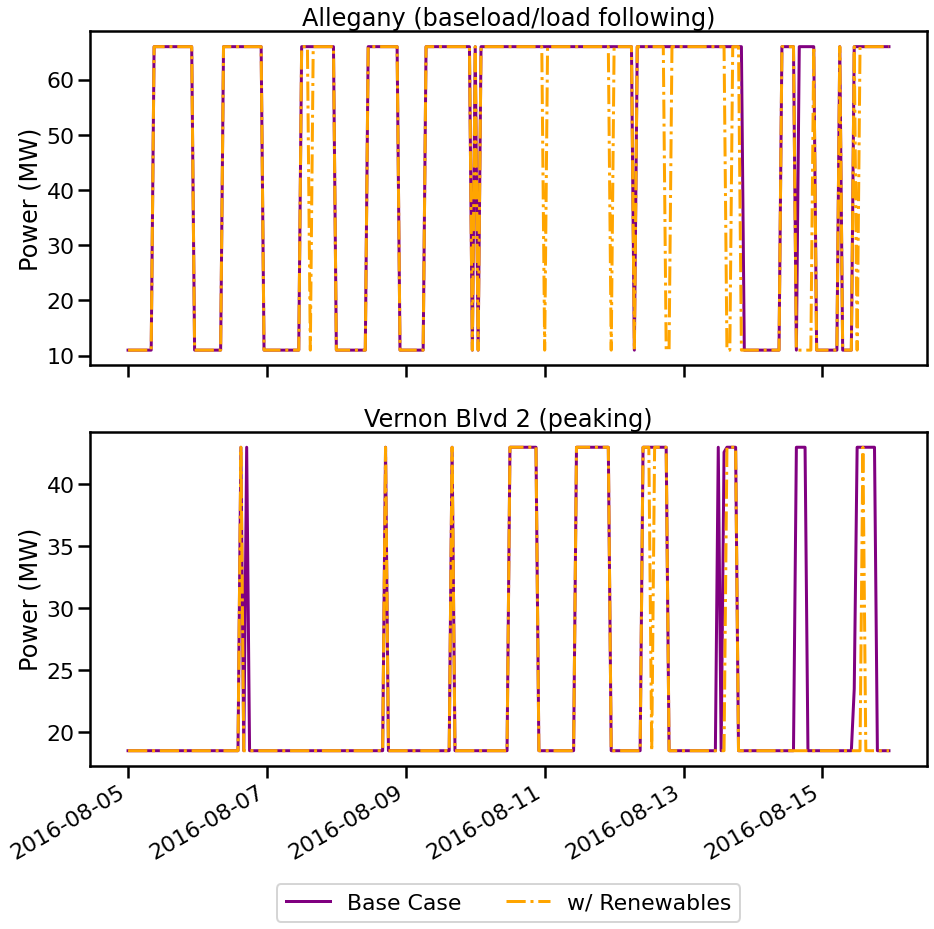

In [35]:
# Note that the column names correspond to the order that you enter the previous two dataframe inputs.
plots.gen_change(2, 215, ed_gen_base, ed_gen, column_names=['Base Case', 'w/ Renewables'],
                 figsize=(15,15), colors=['purple','orange'], linewidth=3, linestyles=['-','-.'], 
                 titlestr1='(baseload/load following)', titlestr2='(peaking)', ylabelstr='Power (MW)', 
                 savefig=True, outfile_pfix='../cmaqpy/data/plots/gen_profs_')

Visualize CO<sub>2</sub> emissions changes.

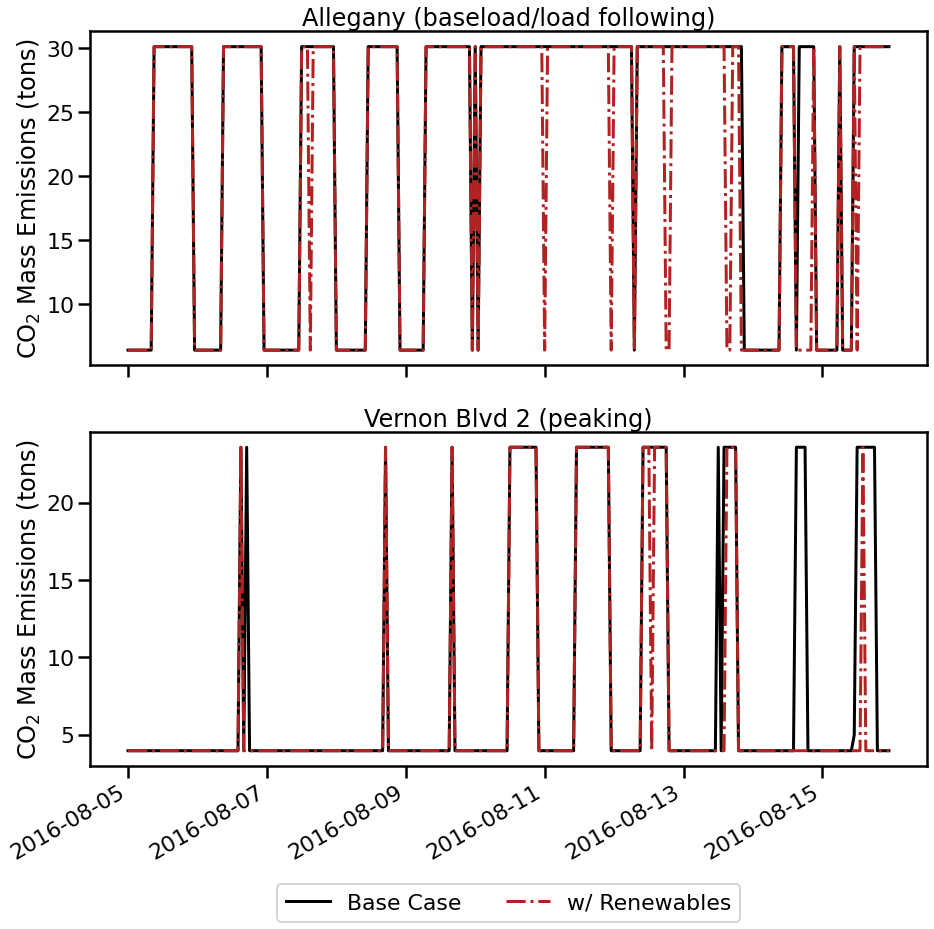

In [31]:
# Note that the column names correspond to the order that you enter the previous two dataframe inputs.
plots.gen_change(2, 215, ml_co2_base, ml_co2, column_names=['Base Case', 'w/ Renewables'],
                 figsize=(15,15), colors=['black','firebrick'], linewidth=3, linestyles=['-','-.'], 
                 titlestr1='(baseload/load following)', titlestr2='(peaking)', ylabelstr='CO$_2$ Mass Emissions (tons)', 
                 savefig=True, outfile_pfix='../cmaqpy/data/plots/co2_profs_')

Visualize SO<sub>2</sub> emissions.

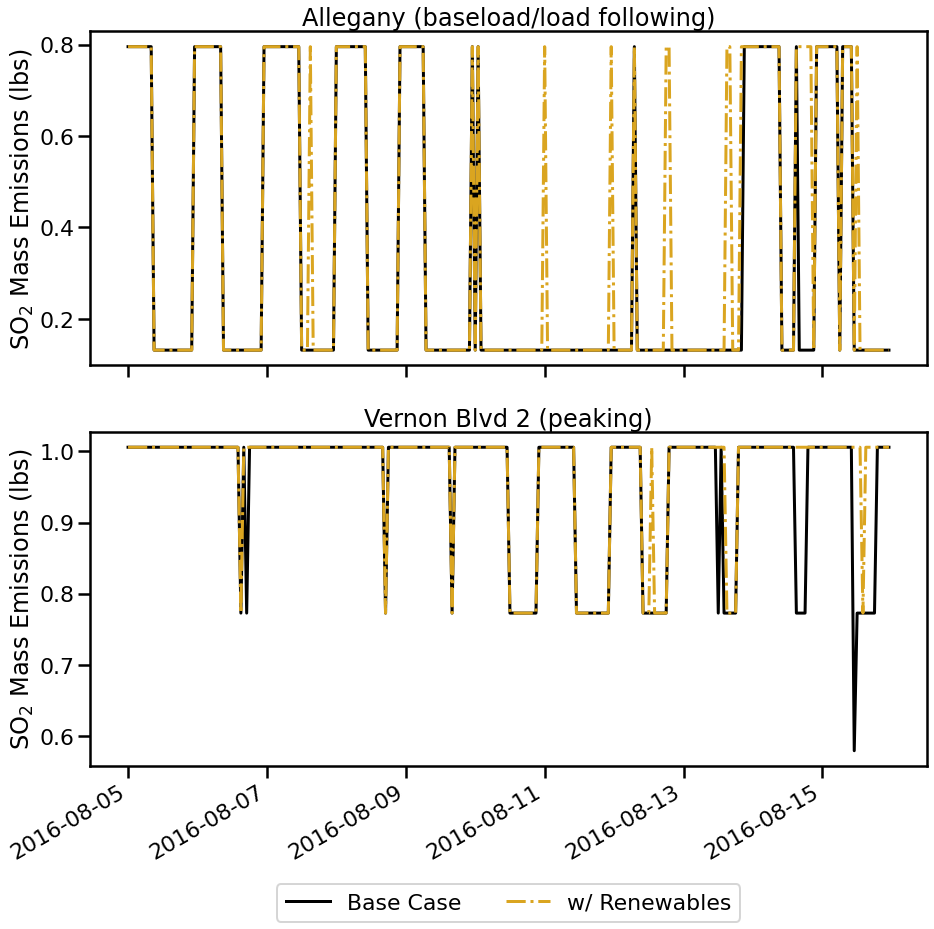

In [32]:
# Note that the column names correspond to the order that you enter the previous two dataframe inputs.
plots.gen_change(2, 215, ml_so2_base, ml_so2, column_names=['Base Case', 'w/ Renewables'],
                 figsize=(15,15), colors=['black','goldenrod'], linewidth=3, linestyles=['-','-.'], 
                 titlestr1='(baseload/load following)', titlestr2='(peaking)', ylabelstr='SO$_2$ Mass Emissions (lbs)', 
                 savefig=True, outfile_pfix='../cmaqpy/data/plots/so2_profs_')

Visualize NO<sub>x</sub> emissions.

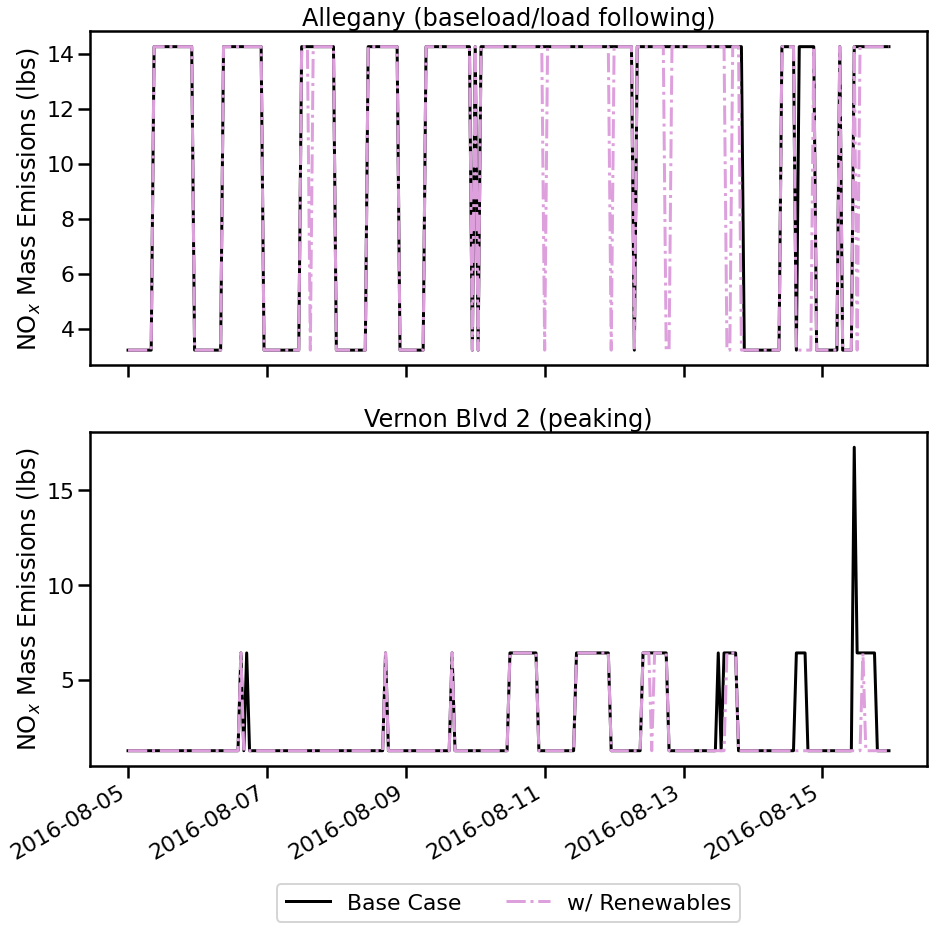

In [34]:
# Note that the column names correspond to the order that you enter the previous two dataframe inputs.
plots.gen_change(2, 215, ml_nox_base, ml_nox, column_names=['Base Case', 'w/ Renewables'],
                 figsize=(15,15), colors=['black','plum'], linewidth=3, linestyles=['-','-.'], 
                 titlestr1='(baseload/load following)', titlestr2='(peaking)', ylabelstr='NO$_x$ Mass Emissions (lbs)', 
                 savefig=True, outfile_pfix='../cmaqpy/data/plots/nox_profs_')